LOAD DATA AND NLTK SET UP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Part1.csv to Part1.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Part1.csv']))
print(df)

        No            Reviewer  \
0        1  Inspire26749099101   
1        2             Gauri T   
2        3       Go08532197513   
3        4         Angshuman K   
4        5   Sherpa22007943639   
...    ...                 ...   
4223  4224           BGCLondon   
4224  4225               garbo   
4225  4226        Freedom34048   
4226  4227           luvtravel   
4227  4228         Lita-FL-USA   

                                                 Review       Date  Rating  
0     Good hotel to stay. Reception should needs imp...  Yesterday      50  
1     Not at all worth inr 14000. Don’t even know wh...  Yesterday      10  
2     Extremely wonderful experience with hospitalit...      8-Dec      50  
3     Stay was very comfortable. Devi and floor supe...      8-Dec      50  
4     It was a great stay. Anupam and his team was r...      8-Dec      50  
...                                                 ...        ...     ...  
4223  I know of what I speak - I am still staying at

**SVM**

Cleaning the data

In [ ]:
df["Rating"].value_counts()

50    2652
40     753
30     376
10     245
20     202
Name: Rating, dtype: int64

In [ ]:
example =df['Review'][50]
example

'Good ambience and good hospitality thanks for your support marygold, you gave us a good comfort in terms of bed sheets and pillow\n\nFood are the restaurant is good especially buffet\n\nThis is good and convenient place for shopping'

In [ ]:
df_neg = df.loc[df['Rating'] <30]
df_neg = df_neg.reset_index(drop = True)

In [ ]:
df_five = df.loc[df['Rating']  > 30]
df_five = df_five.reset_index(drop = True)

In [ ]:
print(len(df_five))

3405


In [ ]:
df_pos= df_five.loc[:len(df_neg)]

In [ ]:
df_all = pd.concat([df_neg,df_pos], axis=0)
df_all= df_all.reset_index(drop = True)

In [ ]:
df_all

,No,Reviewer,Review,Date,Rating
0,2,Gauri T,Not at all worth inr 14000. Don’t even know wh...,Yesterday,10
1,44,Ravi N,"I have stayed at the property before, it was a...",22-Nov,10
2,92,Jinoy,This hotel is not keen on in house guest carpe...,22-Nov,10
3,167,Go50774727345,"I’m regular in this place , 2days back I went ...",22-Oct,10
4,235,Reaan,"Not a 5 star, very basic and mediocre. The sta...",22-Sep,10
...,...,...,...,...,...
890,466,Soni,Hi my stay in the hotel was amazing all staff ...,22-May,50
891,467,Vignesh,Sayantan One of my all time favorite spot in C...,22-May,50
892,468,Deepak K,The stay was good. A little improvement in roo...,22-May,50
893,469,Vijay,The excellent service to give the hotel......w...,22-May,50


Creating a sentiment column

In [ ]:
df_all['Sentiment'] = np.where(df_all["Rating"] == 50,'Postive','Negative')

In [ ]:
df_all = df_all.sample(frac=1)
df_all= df_all.reset_index(drop = True)

In [ ]:
df_all

,No,Reviewer,Review,Date,Rating,Sentiment
0,159,Compass12959122623,It was quite nice to be here at The park. Nice...,22-Oct,50,Postive
1,3529,Deepak R,Guys just don't even think. It is by far the w...,15-Feb,10,Negative
2,346,Prateek,We met Sayantan at the reception who was very ...,22-Jul,50,Postive
3,327,Nikhil,"Recently, I stayed the Park, Chennai for 6 day...",22-Jul,50,Postive
4,3276,Prabu M,We had booked this hotel on new year eve.. Che...,16-Jan,10,Negative
...,...,...,...,...,...,...
890,355,Mohan Kumar,Special Thank to Mr. Pratik and Mr. Ajay from ...,22-Jul,50,Postive
891,2670,Vasudev P,"The 3 of us viz. self, spouse and daughter wer...",17-Oct,20,Negative
892,3689,GEETA B,The customer service is very low. They took 2 ...,14-Jun,10,Negative
893,3221,MURALI ANUR,I have traveled length and breadth of the coun...,16-Mar,10,Negative


Split into test and train examples

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(df_all.Review, df_all.Sentiment)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
x_train_vec= v.fit_transform(x_train)
x_test_vec= v.transform(x_test)

Use a classification model

In [ ]:
from sklearn import svm
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(x_train_vec, y_train)

SVC(kernel='linear')

Test accuracy

In [ ]:
clf_svm.score(x_test_vec, y_test)

0.9866071428571429

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(x_test_vec), average = None)

array([0.98701299, 0.98617512])

In [ ]:
rev=["This is place very bad"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

In [ ]:
df1=df.iloc[:3990]

In [ ]:
df1

,No,Reviewer,Review,Date,Rating
0,1,Inspire26749099101,Good hotel to stay. Reception should needs imp...,Yesterday,50
1,2,Gauri T,Not at all worth inr 14000. Don’t even know wh...,Yesterday,10
2,3,Go08532197513,Extremely wonderful experience with hospitalit...,8-Dec,50
3,4,Angshuman K,Stay was very comfortable. Devi and floor supe...,8-Dec,50
4,5,Sherpa22007943639,It was a great stay. Anupam and his team was r...,8-Dec,50
...,...,...,...,...,...
3985,3986,RameezA,Had visited the place a couple of times. The p...,12-Feb,40
3986,3987,anon187062,it is adequate and supposedbto be 5 star with ...,12-Feb,40
3987,3988,Amit P,I have stayed at this property few times befor...,12-Feb,20
3988,3989,CaptChaitanya,Have stayed at The Park Chennai for a few time...,12-Jan,30


In [ ]:
df2=df.tail(228)

In [ ]:
df2

,No,Reviewer,Review,Date,Rating
4000,4001,Subhorov,It is always nostalgic to go back to Park in a...,11-Dec,30
4001,4002,comPassionateLens,Spent two nights here in Nov 2011. Food in the...,11-Dec,30
4002,4003,RLMUK,Stayed at The Park for 10 days whilst in Chenn...,11-Dec,40
4003,4004,bangalore_ashish,This hotel is some 45 minutes from the airport...,11-Dec,40
4004,4005,Rohitd1982,Good place in case you are going for Visa inte...,11-Dec,50
...,...,...,...,...,...
4223,4224,BGCLondon,I know of what I speak - I am still staying at...,6-Jan,10
4224,4225,garbo,We went to Chennai with a bunch of friends for...,5-Apr,50
4225,4226,Freedom34048,"Small rooms, extremely smoky bar with music to...",5-Mar,30
4226,4227,luvtravel,I stayed at The Park for four nights in Decemb...,4-Dec,40


In [ ]:
df.head()

,No,Reviewer,Review,Date,Rating
0,1,Inspire26749099101,Good hotel to stay. Reception should needs imp...,Yesterday,50
1,2,Gauri T,Not at all worth inr 14000. Don’t even know wh...,Yesterday,10
2,3,Go08532197513,Extremely wonderful experience with hospitalit...,8-Dec,50
3,4,Angshuman K,Stay was very comfortable. Devi and floor supe...,8-Dec,50
4,5,Sherpa22007943639,It was a great stay. Anupam and his team was r...,8-Dec,50


In [ ]:
print(df.shape)

(4228, 5)


EDA

<Axes: title={'center': 'Count of Reviews by Ratings'}>

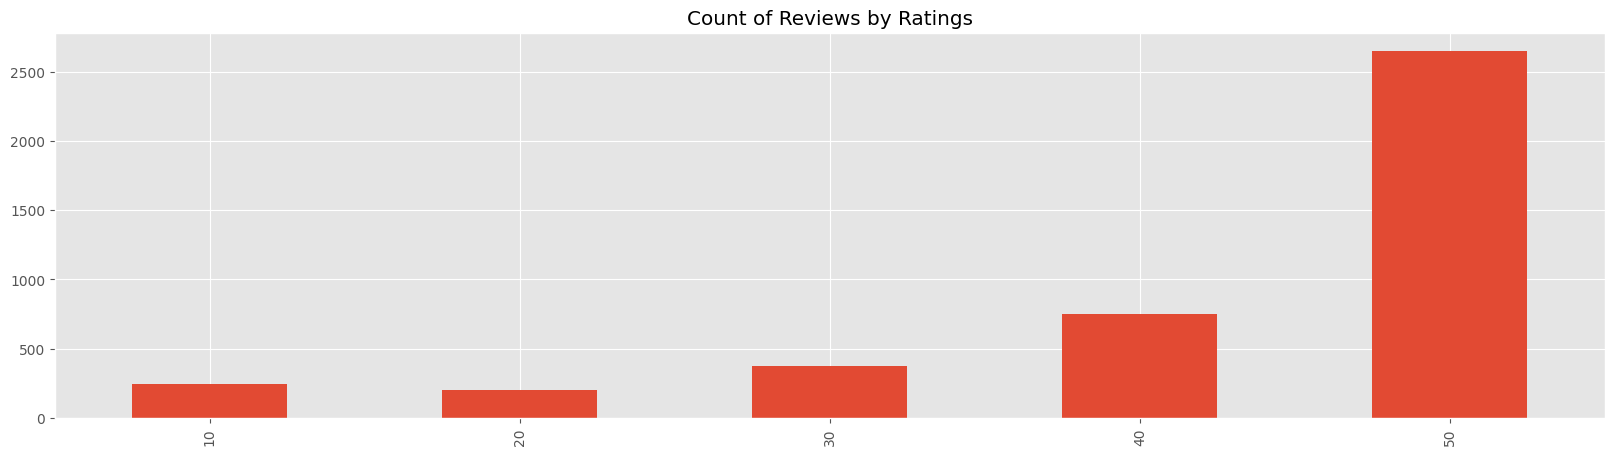

In [ ]:
df['Rating'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Ratings',figsize=(20,5))

BASIC NLTK

In [ ]:
import nltk
nltk.download('punkt')
tokens=nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Good',
 'ambience',
 'and',
 'good',
 'hospitality',
 'thanks',
 'for',
 'your',
 'support',
 'marygold']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Good', 'JJ'),
 ('ambience', 'NN'),
 ('and', 'CC'),
 ('good', 'JJ'),
 ('hospitality', 'NN'),
 ('thanks', 'NNS'),
 ('for', 'IN'),
 ('your', 'PRP$'),
 ('support', 'NN'),
 ('marygold', 'NN')]

VADER model

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores('This is very good')

if sentiment['pos'] > 0.5:
  print('Positive')
elif sentiment['neg'] > 0.5:
  print('Negative')
else:
  print('Neutral')


Positive


In [ ]:
sia.polarity_scores('this worst')

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9666}

In [ ]:
#Run the polarity score on the entire dataset
res ={}
for i,row in tqdm(df.iterrows(), total=len(df)):
  review = row['Review']
  id= row['No']
  res[id] = sia.polarity_scores(review)


  0%|          | 0/4228 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.055, 'neu': 0.776, 'pos': 0.17, 'compound': 0.6124},
 2: {'neg': 0.129, 'neu': 0.803, 'pos': 0.068, 'compound': -0.8931},
 3: {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.9366},
 4: {'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.938},
 5: {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.9828},
 6: {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9707},
 7: {'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'compound': 0.3987},
 8: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9515},
 9: {'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.9311},
 10: {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.8854},
 11: {'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.9723},
 12: {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9571},
 13: {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9349},
 14: {'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9731},
 15: {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.8347},
 16: 

In [ ]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.055,0.776,0.170,0.6124
2,0.129,0.803,0.068,-0.8931
3,0.000,0.653,0.347,0.9366
4,0.000,0.779,0.221,0.9380
5,0.000,0.519,0.481,0.9828
...,...,...,...,...
4224,0.060,0.831,0.109,0.9910
4225,0.019,0.748,0.233,0.9966
4226,0.000,0.891,0.109,0.4019
4227,0.102,0.798,0.100,-0.1761


In [ ]:
vaders =  pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'No'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders

,No,neg,neu,pos,compound,Reviewer,Review,Date,Rating
0,1,0.055,0.776,0.170,0.6124,Inspire26749099101,Good hotel to stay. Reception should needs imp...,Yesterday,50
1,2,0.129,0.803,0.068,-0.8931,Gauri T,Not at all worth inr 14000. Don’t even know wh...,Yesterday,10
2,3,0.000,0.653,0.347,0.9366,Go08532197513,Extremely wonderful experience with hospitalit...,8-Dec,50
3,4,0.000,0.779,0.221,0.9380,Angshuman K,Stay was very comfortable. Devi and floor supe...,8-Dec,50
4,5,0.000,0.519,0.481,0.9828,Sherpa22007943639,It was a great stay. Anupam and his team was r...,8-Dec,50
...,...,...,...,...,...,...,...,...,...
4223,4224,0.060,0.831,0.109,0.9910,BGCLondon,I know of what I speak - I am still staying at...,6-Jan,10
4224,4225,0.019,0.748,0.233,0.9966,garbo,We went to Chennai with a bunch of friends for...,5-Apr,50
4225,4226,0.000,0.891,0.109,0.4019,Freedom34048,"Small rooms, extremely smoky bar with music to...",5-Mar,30
4226,4227,0.102,0.798,0.100,-0.1761,luvtravel,I stayed at The Park for four nights in Decemb...,4-Dec,40


In [ ]:
vaders.head

<bound method NDFrame.head of         No    neg    neu    pos  compound            Reviewer  \
0        1  0.055  0.776  0.170    0.6124  Inspire26749099101   
1        2  0.129  0.803  0.068   -0.8931             Gauri T   
2        3  0.000  0.653  0.347    0.9366       Go08532197513   
3        4  0.000  0.779  0.221    0.9380         Angshuman K   
4        5  0.000  0.519  0.481    0.9828   Sherpa22007943639   
...    ...    ...    ...    ...       ...                 ...   
4223  4224  0.060  0.831  0.109    0.9910           BGCLondon   
4224  4225  0.019  0.748  0.233    0.9966               garbo   
4225  4226  0.000  0.891  0.109    0.4019        Freedom34048   
4226  4227  0.102  0.798  0.100   -0.1761           luvtravel   
4227  4228  0.000  0.752  0.248    0.8979         Lita-FL-USA   

                                                 Review       Date  Rating  
0     Good hotel to stay. Reception should needs imp...  Yesterday      50  
1     Not at all worth inr 14000. D

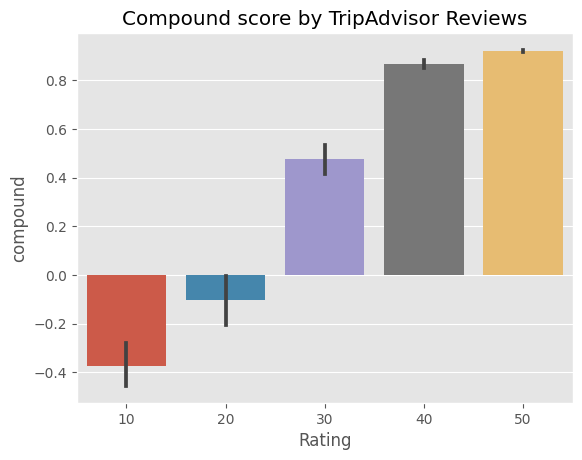

In [ ]:
ax = sns.barplot(data=vaders, x='Rating' ,y='compound')
ax.set_title('Compound score by TripAdvisor Reviews')
plt.show()

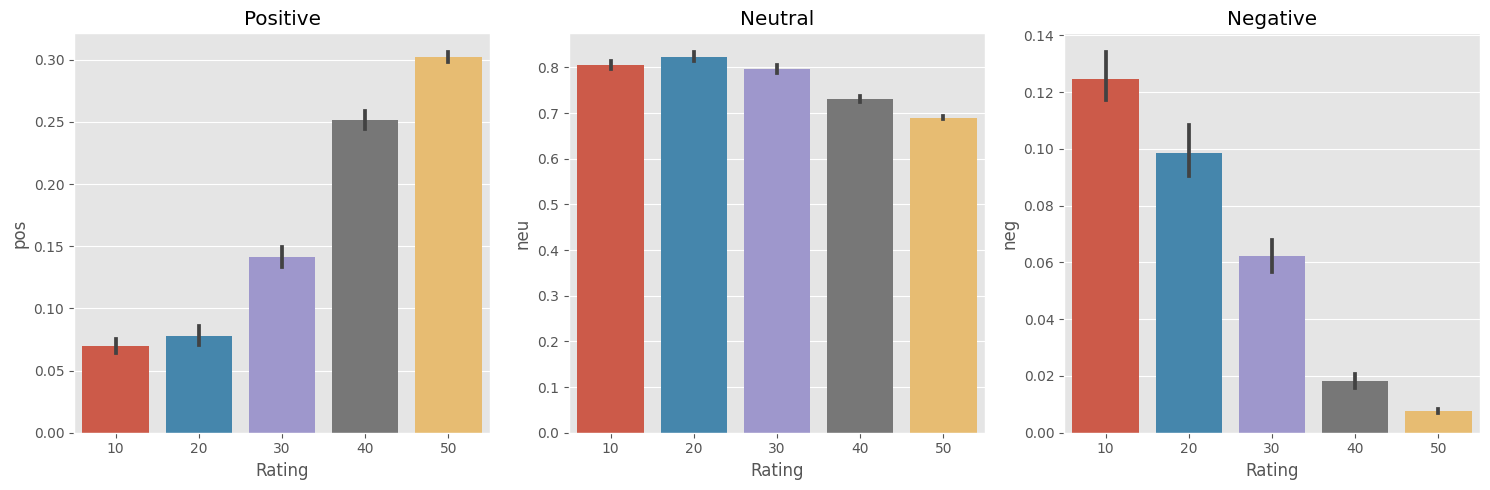

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Roberta Pretrained Model**

In [ ]:
!pip install transformers
from transformers import AutoTokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Good ambience and good hospitality thanks for your support marygold, you gave us a good comfort in terms of bed sheets and pillow

Food are the restaurant is good especially buffet

This is good and convenient place for shopping


{'neg': 0.0, 'neu': 0.57, 'pos': 0.43, 'compound': 0.9666}

In [ ]:
# Roberta model on a example
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0013943762, 'roberta_neu': 0.01134853, 'roberta_pos': 0.98725706}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:

res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    try:
        review = row['Review']
        myid = row['No']
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/3990 [00:00<?, ?it/s]

Broke for id 475
Broke for id 555
Broke for id 650
Broke for id 2216
Broke for id 2309
Broke for id 2543
Broke for id 2661
Broke for id 2719
Broke for id 2967
Broke for id 3048
Broke for id 3053
Broke for id 3116
Broke for id 3119
Broke for id 3196
Broke for id 3252
Broke for id 3372
Broke for id 3441
Broke for id 3452
Broke for id 3510
Broke for id 3536
Broke for id 3571
Broke for id 3584
Broke for id 3661
Broke for id 3679
Broke for id 3714
Broke for id 3770
Broke for id 3886


In [ ]:

res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        review = row['Review']
        myid = row['No']
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/228 [00:00<?, ?it/s]

Broke for id 4224


In [ ]:

results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'No'})
results_df = results_df.merge(df, how='left')


In [ ]:

results_df


,No,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Reviewer,Review,Date,Rating
0,4001,0.151,0.779,0.070,-0.9297,0.800847,0.172196,0.026957,Subhorov,It is always nostalgic to go back to Park in a...,11-Dec,30
1,4002,0.000,0.735,0.265,0.9393,0.001516,0.010560,0.987924,comPassionateLens,Spent two nights here in Nov 2011. Food in the...,11-Dec,30
2,4003,0.000,0.638,0.362,0.9948,0.003129,0.046254,0.950617,RLMUK,Stayed at The Park for 10 days whilst in Chenn...,11-Dec,40
3,4004,0.000,0.820,0.180,0.9729,0.003757,0.033841,0.962402,bangalore_ashish,This hotel is some 45 minutes from the airport...,11-Dec,40
4,4005,0.000,0.799,0.201,0.8519,0.004672,0.057081,0.938247,Rohitd1982,Good place in case you are going for Visa inte...,11-Dec,50
...,...,...,...,...,...,...,...,...,...,...,...,...
222,4223,0.011,0.727,0.262,0.9939,0.003285,0.025436,0.971279,Mahesh Jegadeesan,Hello people\n\nI am from India and m here to ...,6-Apr,50
223,4225,0.019,0.748,0.233,0.9966,0.002700,0.033565,0.963735,garbo,We went to Chennai with a bunch of friends for...,5-Apr,50
224,4226,0.000,0.891,0.109,0.4019,0.433068,0.432102,0.134831,Freedom34048,"Small rooms, extremely smoky bar with music to...",5-Mar,30
225,4227,0.102,0.798,0.100,-0.1761,0.241763,0.371852,0.386386,luvtravel,I stayed at The Park for four nights in Decemb...,4-Dec,40


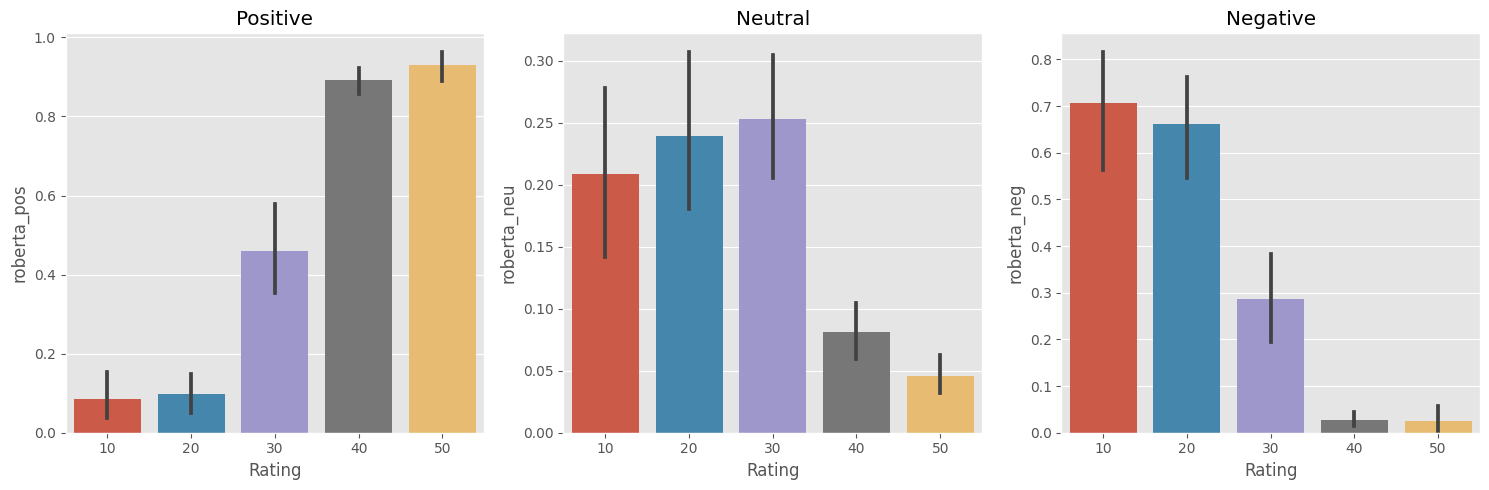

In [ ]:

fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=results_df, x='Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=results_df, x='Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=results_df, x='Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [ ]:

results_df.columns


Index(['No', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Reviewer', 'Review',
       'Date', 'Rating'],
      dtype='object')

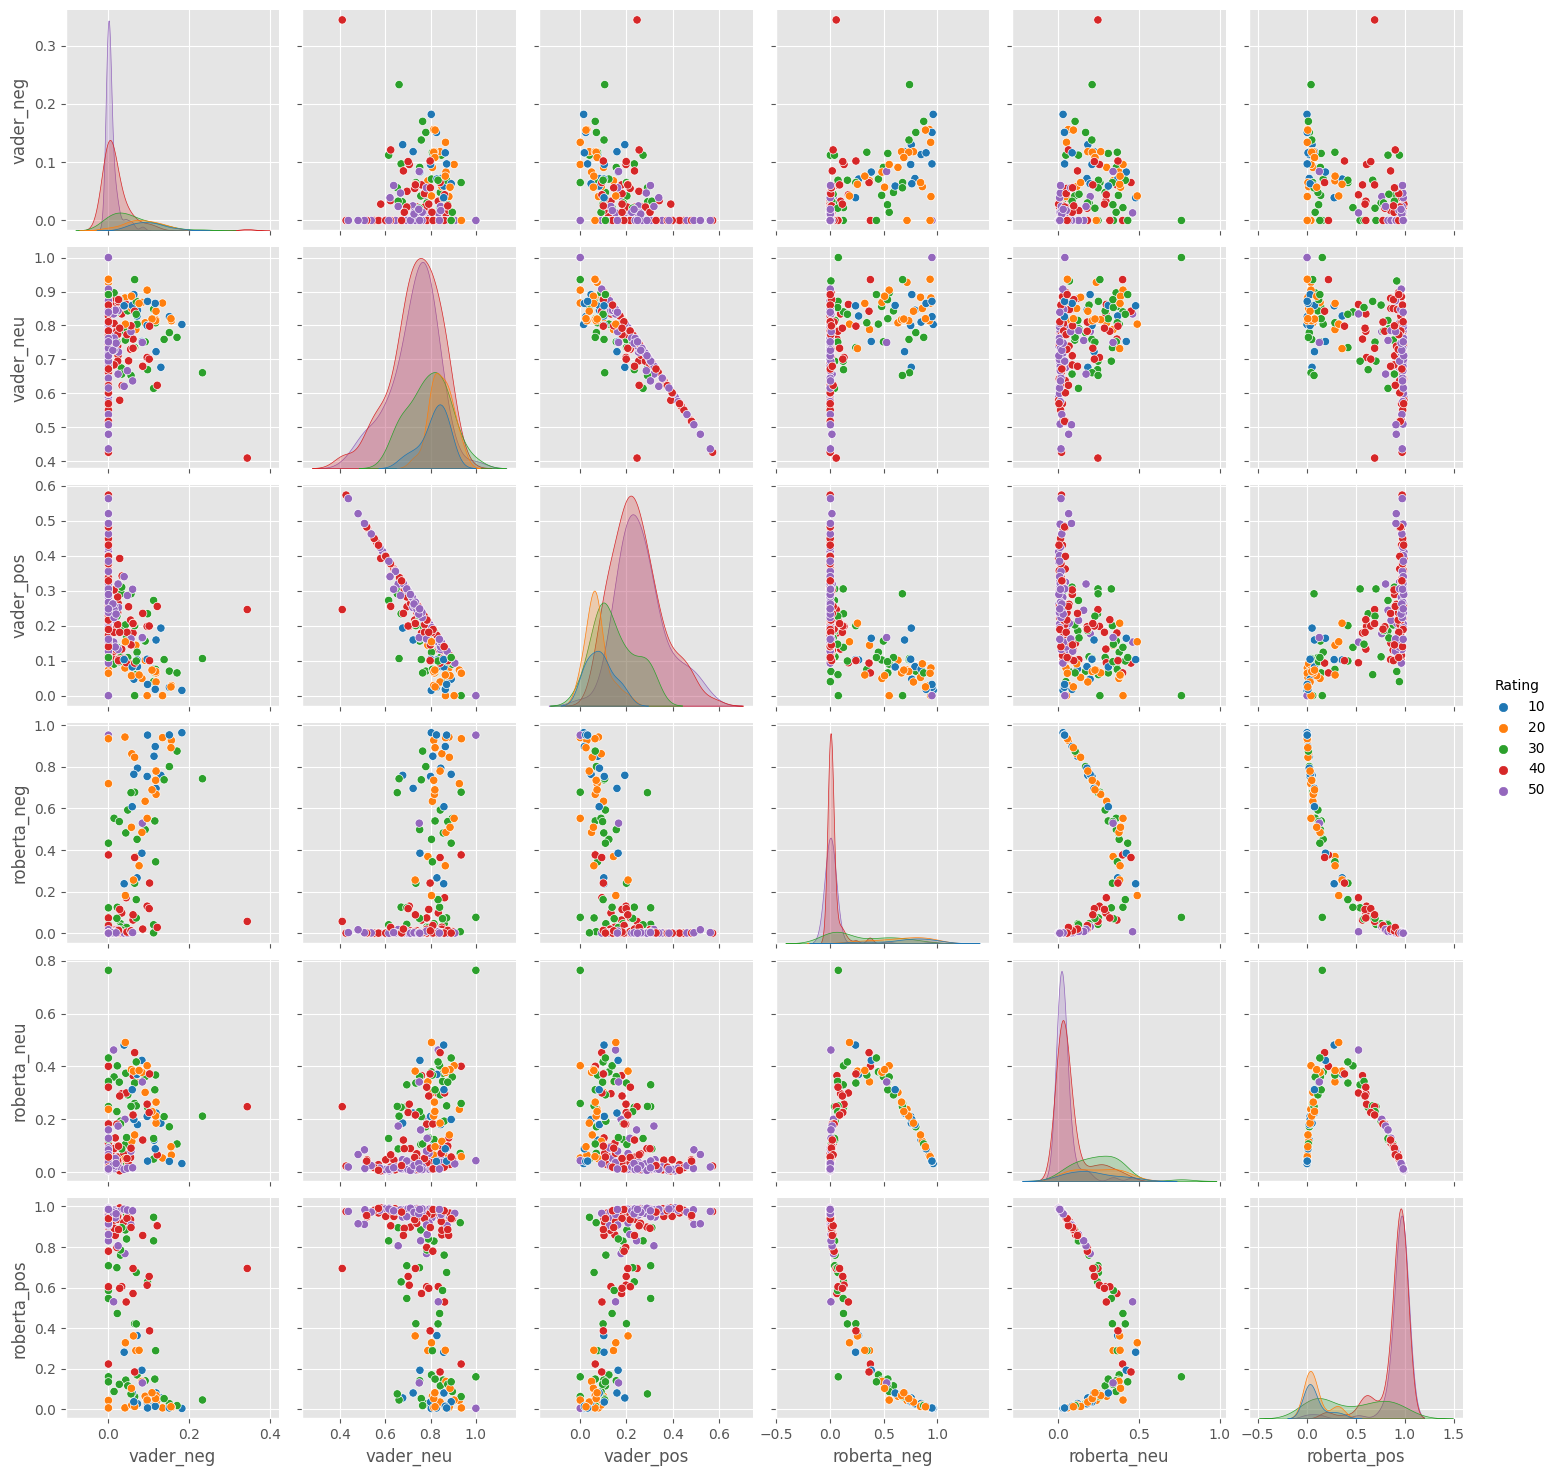

In [ ]:

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()


In [ ]:

results_df.query('Rating == 10') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]


"We had heard stories of wonderful hotels in India and therefore for a 5 star hotel our expectations were reasonably high.\n\nWe arrived here at about 2am from the airport. First impressions not good and it didn't get any better - Saturday is party night in Chennai the hotel is obviously an important meeting place for 'party' people. The whole parking area was solid with cars queueing to pick up. It seemed to take forever to get to the front door, our bags were taken from us and just left at the place others were waiting for their car to pick them up. We decided to stay with the bags!\n\nWe paid for a larger room - the room was not large - I would hate to see the size of a standard one! The room was shabby and damp, bathroom old, curtains had mound on inside. The bed was comfortable and it had nice sheets, can't fault it - we had a comfortable sleep.\n\nThe reception area was spacious and probably once was hip and trendy - to us it was pretentious and drab.\n\nBreakfast was good, excel

In [ ]:

results_df.query('Rating == 10') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]


'since this hotel has nice restaurants and the famous pub leatherbar, i considered staying here on my last visit to chennai. however i regretted this decision, the rooms are cramped and old....services sucks. the only lifesaver is the morning complimentary breakfast. pls avoid staying here if possible'

In [ ]:

results_df.query('Rating == 50') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]


'I did not felt the heat of chennai because of park!!!!!!!!!'

In [ ]:

results_df.query('Rating == 50') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]


'Exellent service and comfort. They are the real thing, a true five star hotel. The breakfast is the only thing I disliked, however, the food in general was exellent.'